In [1]:
#importing libraries

import xarray as xr
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
ds_tem_and_pre=xr.open_dataset('ALL.nc')
#ds_tem_and_pre=ds_tem_and_pre.where(ds_tem_and_pre !=-99)

In [3]:
Year=['1901','1902','1903','1904','1905','1906','1907','1908','1909','1910','1911','1912','1913','1914','1915','1916','1917','1918','1919','1920','1921','1922','1923','1924','1925','1926','1927','1928','1929','1930','1931','1932','1933','1934','1935','1936','1937','1938','1939','1940','1941','1942','1943','1944','1945','1946','1947','1948','1949','1950','1951','1952','1953','1954','1955','1956','1957','1958','1959','1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009', '2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
Months=['January','February','March','April','May','June','July','August','September','October','November','December']

In [4]:
da_tmp=ds_tem_and_pre.tmp
da_pre=ds_tem_and_pre.pre


In [5]:
da_tmp

<xarray.DataArray 'tmp' (time: 1452, lat: 360, lon: 720)>
[376358400 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2021-12-16
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

In [6]:
coord_da_tmp1=da_tmp.sel(lon=-2.46, lat=13.54, method = 'nearest')#.sel(time=slice('1901','1930'))
coord_da_pre1=da_pre.sel(lon=-2.46, lat=13.54, method = 'nearest')#.sel(time=slice('1901','1930'))
coord_da_tmp=coord_da_tmp1.groupby('time.year').mean('time')
coord_da_pre=coord_da_pre1.groupby('time.year').sum('time')

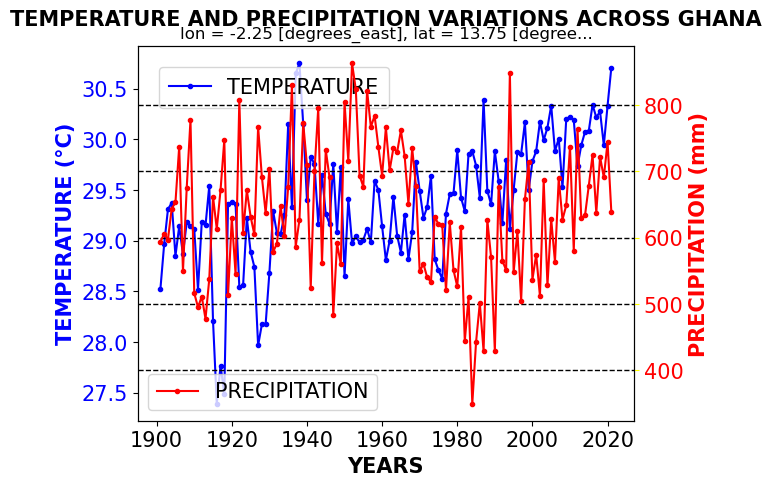

In [7]:
# plotting temp and precip
#plt.plot(Year,coord_da_tmp)
coord_da_tmp.plot(color='blue',marker='.',label='TEMPERATURE')
#legend
plt.legend(loc='upper left',fontsize=15,frameon=True, borderpad=0.5, borderaxespad=1)
plt.xlabel('YEARS',fontsize=15, fontweight='bold',color='black')
plt.xticks(fontsize =15,color='black')
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=0)
plt.ylabel('TEMPERATURE (°C)',fontsize=15, fontweight='bold',color='blue', alpha=1)
plt.yticks(fontsize =15,color='blue')
plt.twinx()
coord_da_pre.plot(color='r',marker='.',label='PRECIPITATION')
plt.legend(fontsize=15)
plt.ylabel('PRECIPITATION (mm)',fontsize=15, fontweight='bold',color='red', alpha=1)
#pad are used to move titles location
plt.title('TEMPERATURE AND PRECIPITATION VARIATIONS ACROSS GHANA',fontsize=15, fontweight='bold',color='black', pad=15)

# ENLARGING THE FIGURE SIZE
barwidth = 1
plt.rcParams['figure.figsize']=[13,7]
#plt.plot(Year,tmp_years)


#naming the axis
plt.tick_params(axis='both',color='yellow')
# setting x and y limits
#plt.xlim(0, 19000)
#plt.ylim(20, 30)

plt.yticks(fontsize =15,color='r')
plt.xticks(fontsize =15,color='r')

# Plot layout
plt.subplots_adjust(bottom=0.1)

# add a grid
plt.grid(True, linestyle='--', linewidth=1,color='black')
plt.savefig('tmp_and_pre.png',dpi=500)


In [8]:
#GROUPING INTO MONTHS
month_da_tmp=coord_da_tmp1.groupby('time.month').mean('time')
month_da_pre=coord_da_pre1.groupby('time.month').sum('time')

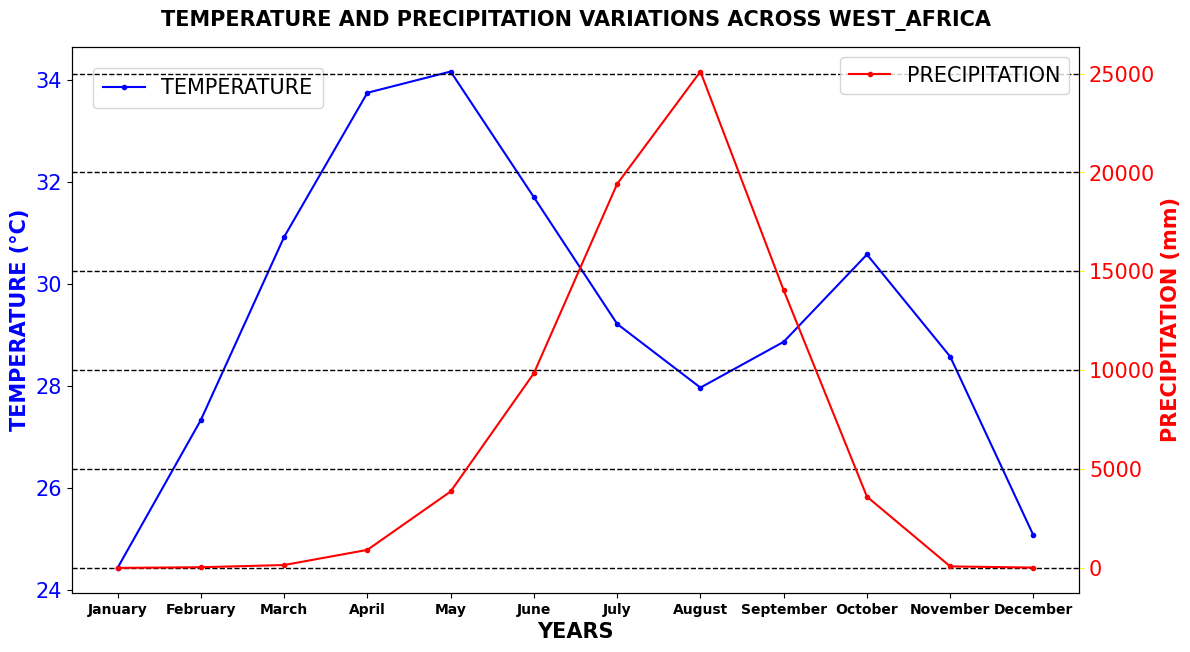

In [9]:



# plotting temp and precip
plt.plot(Months,month_da_tmp,color='blue',marker='.',label='TEMPERATURE')
#month_da_tmp.plot(color='blue',marker='.',label='TEMPERATURE')
#legend
plt.legend(loc='upper left',fontsize=15,frameon=True, borderpad=0.5, borderaxespad=1)
plt.xlabel('YEARS',fontsize=15, fontweight='bold',color='black')
plt.xticks(fontsize =10,color='black', fontweight='bold')
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=0)
plt.ylabel('TEMPERATURE (°C)',fontsize=15, fontweight='bold',color='blue', alpha=1)
plt.yticks(fontsize =15,color='blue')
plt.twinx()
plt.plot(Months,month_da_pre,color='r',marker='.',label='PRECIPITATION')
#month_da_pre.plot(color='r',marker='.',label='PRECIPITATION')
plt.legend(fontsize=15)
plt.ylabel('PRECIPITATION (mm)',fontsize=15, fontweight='bold',color='red', alpha=1)
#pad are used to move titles location
plt.title('TEMPERATURE AND PRECIPITATION VARIATIONS ACROSS WEST_AFRICA',fontsize=15, fontweight='bold',color='black', pad=15)

# ENLARGING THE FIGURE SIZE
barwidth = 1
plt.rcParams['figure.figsize']=[13,7]
#plt.plot(Year,tmp_years)


#naming the axis
plt.tick_params(axis='both',color='yellow')
# setting x and y limits
#plt.xlim(0, 19000)
#plt.ylim(20, 30)

plt.yticks(fontsize =15,color='r')
plt.xticks(fontsize =15,color='r')

# Plot layout
plt.subplots_adjust(bottom=0.1)

# add a grid
plt.grid(True, linestyle='--', linewidth=1,color='black')
plt.savefig('tmp_and_pre_month.png',dpi=500)


<BarContainer object of 121 artists>

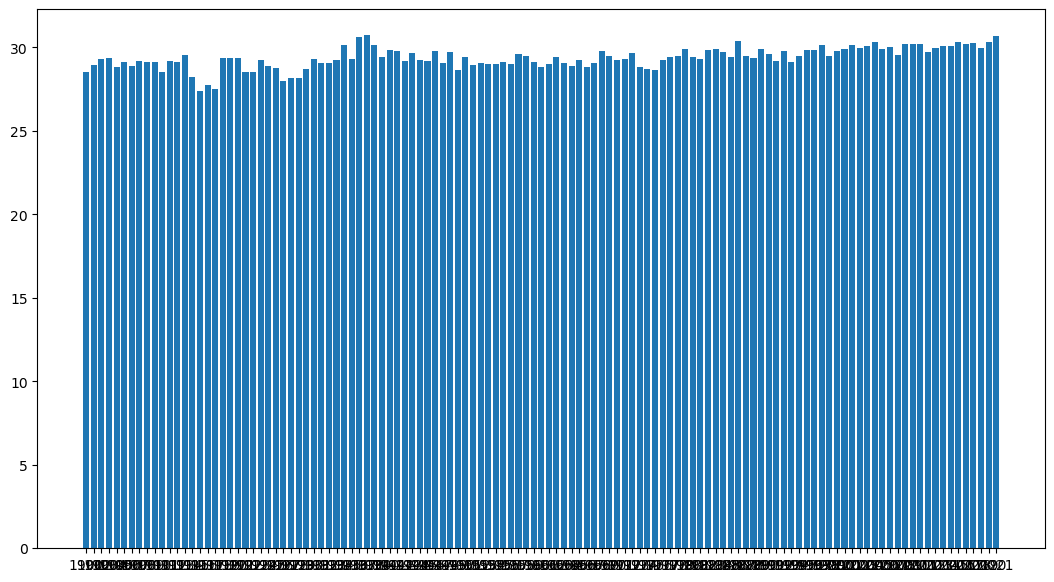

In [16]:
plt.bar(Months,month_da_tmp,color='black',width = barwidth, edgecolor = 'white',label='TEMPERATURE')
plt.bar(Year,coord_da_tmp)